In [2]:
!pip install pywaffle 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 13.6 MB/s eta 0:00:00


In [3]:
# --- Importation des librairies ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_profiling
import seaborn as sns
import warnings
import os
import yellowbrick
import scipy.cluster.hierarchy as shc
import matplotlib.patches as patches

from matplotlib.patches import Rectangle
from pandas_profiling import ProfileReport
from pywaffle import Waffle
from math import isnan
from random import sample
from numpy.random import uniform
from sklearn.neighbors import NearestNeighbors
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from yellowbrick.style import set_palette
from yellowbrick.contrib.wrapper import wrap

# --- Configuration des librairies ---
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 600
sns.set(rc = {'axes.facecolor': '#FBFBFB', 'figure.facecolor': '#FBFBFB'})
class clr:
    start = '\033[93m'+'\033[1m'
    color = '\033[93m'
    end = '\033[0m'

# <div class="header1">7. | Modèles Clustering⚙</div>
<div class="explain-box">
    Cette section va <mark><b>mettre en œuvre des techniques de regroupement</b></mark> comme mentionné dans la première section. De plus, <b>une explication sera fournie pour chaque modèle</b>.
</div>

## <div class="header2">7.1 | K-Means</div>
<div class="explain-box">
    <blockquote style="color: #000000;">
Le <mark><b>regroupement K-means</b></mark> est un algorithme <b>d'apprentissage non supervisé</b> simple qui est utilisé <b>pour résoudre des problèmes de regroupement</b>. Il suit une procédure simple de <b>classification d'un ensemble de données donné en un certain nombre de groupes, définis par la lettre "k"</b>, qui est fixée à l'avance. Les groupes sont ensuite positionnés en tant que <b>points</b> et toutes les observations ou données sont associées au groupe le plus proche, calculées, ajustées, puis le processus recommence en utilisant les nouveaux ajustements jusqu'à ce qu'un résultat souhaité soit atteint.
    <center>
    <img src="https://editor.analyticsvidhya.com/uploads/46668k-means-clustering-algorithm-in-machine-learning.png" alt="Kmeans" width="35%"><br>
    <i style="font-size: 10px;">🖼 K-Means Clustering by Pranshu Sharma</i>
    </center>
    </blockquote>
    Avant de mettre en œuvre K-Means, la première étape consiste à <mark><b>calculer le nombre optimal de groupes à l'aide du score de coude</b></mark>. En outre, l'<b>indice de Calinski-Harabasz sera utilisé pour déterminer le nombre idéal de groupes</b>.
</div>

In [11]:
X = np.loadtxt("../data/donnee_acp.txt")

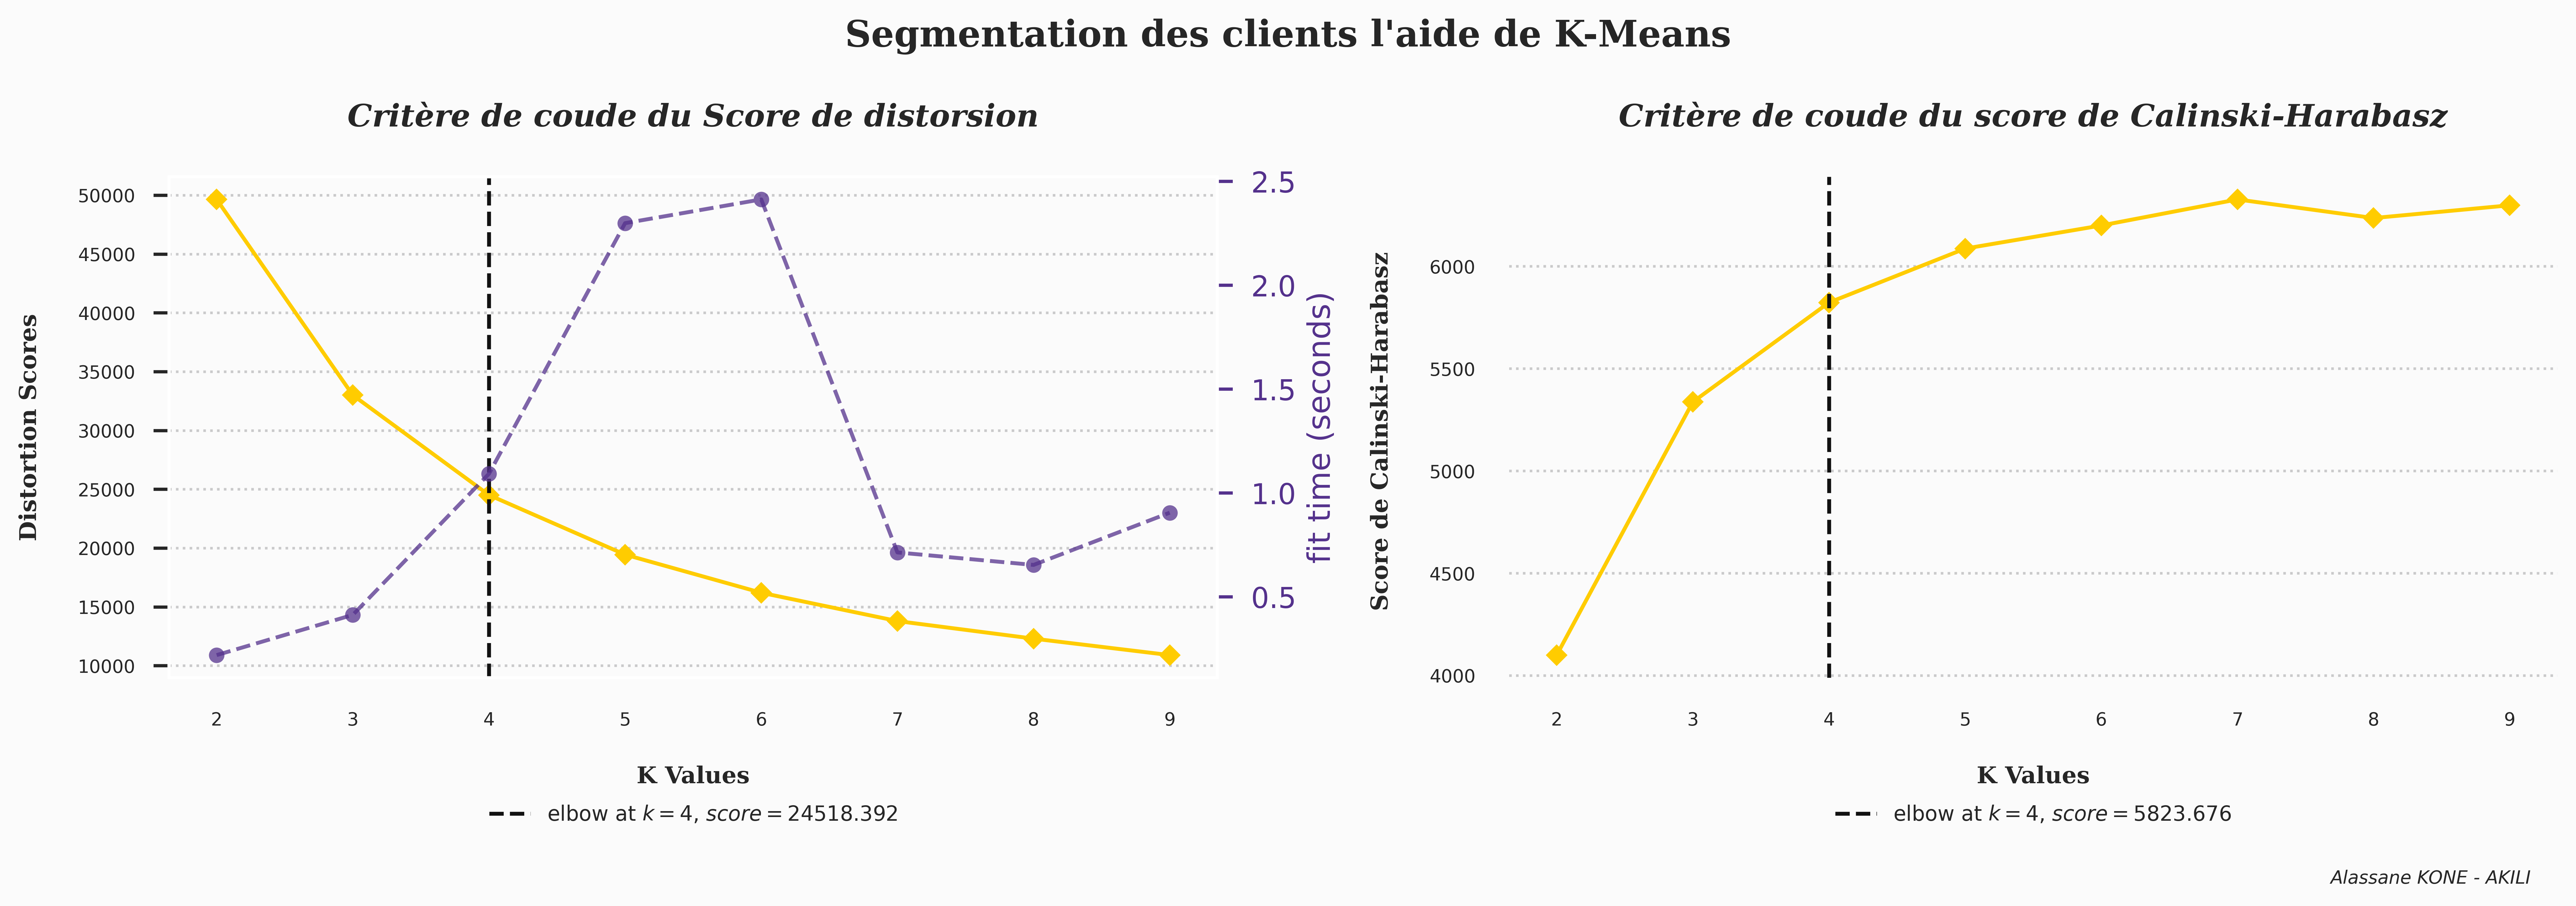

In [12]:
# --- Define K-Means Functions ---
def kmeans():
    
    # --- Figures Settings ---
    color_palette=['#FFCC00', '#54318C']
    set_palette(color_palette)
    title=dict(fontsize=12, fontweight='bold', style='italic', fontfamily='serif')
    text_style=dict(fontweight='bold', fontfamily='serif')
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    
    # --- Elbow Score ---
    elbow_score = KElbowVisualizer(KMeans(random_state=32, max_iter=500), k=(2, 10), ax=ax1)
    elbow_score.fit(X)
    elbow_score.finalize()
    elbow_score.ax.set_title('Critère de coude du Score de distorsion\n', **title)
    elbow_score.ax.tick_params(labelsize=7)
    for text in elbow_score.ax.legend_.texts:
        text.set_fontsize(9)
    for spine in elbow_score.ax.spines.values():
        spine.set_color('None')
    elbow_score.ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), borderpad=2, frameon=False, fontsize=8)
    elbow_score.ax.grid(axis='y', alpha=0.5, color='#9B9A9C', linestyle='dotted')
    elbow_score.ax.grid(axis='x', alpha=0)
    elbow_score.ax.set_xlabel('\nK Values', fontsize=9, **text_style)
    elbow_score.ax.set_ylabel('Distortion Scores\n', fontsize=9, **text_style)
    
    # --- Elbow Score (Calinski-Harabasz Index) ---
    elbow_score_ch = KElbowVisualizer(KMeans(random_state=32, max_iter=500), k=(2, 10), metric='calinski_harabasz', timings=False, ax=ax2)
    elbow_score_ch.fit(X)
    elbow_score_ch.finalize()
    elbow_score_ch.ax.set_title('Critère de coude du score de Calinski-Harabasz\n', **title)
    elbow_score_ch.ax.tick_params(labelsize=7)
    for text in elbow_score_ch.ax.legend_.texts:
        text.set_fontsize(9)
    for spine in elbow_score_ch.ax.spines.values():
        spine.set_color('None')
    elbow_score_ch.ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), borderpad=2, frameon=False, fontsize=8)
    elbow_score_ch.ax.grid(axis='y', alpha=0.5, color='#9B9A9C', linestyle='dotted')
    elbow_score_ch.ax.grid(axis='x', alpha=0)
    elbow_score_ch.ax.set_xlabel('\nK Values', fontsize=9, **text_style)
    elbow_score_ch.ax.set_ylabel('Score de Calinski-Harabasz \n', fontsize=9, **text_style)
    
    plt.suptitle("Segmentation des clients l'aide de K-Means", fontsize=14, **text_style)
    plt.gcf().text(0.9, 0.05, 'Alassane KONE - AKILI', style='italic', fontsize=7)
    plt.tight_layout()
    plt.show();

# --- Calling K-Means Functions ---
kmeans();

<div class="explain-box">
Sur la base des résultats de la méthode de coude et du score de Calinski Harabasz ci-dessus, on peut conclure que le <b>meilleur nombre de regroupements</b> pour l'algorithme K-Means est de <mark><b>4 groupes</b></mark>. Les étapes suivantes vont <mark><b>appliquer le nombre de regroupements optimaux, visualiser la distribution des groupes et les diagrammes de silhouette pour évaluer leurs performances</b></mark>.
</div>


In [ ]:
# --- Implementing K-Means ---
kmeans = KMeans(n_clusters=4, random_state=32, max_iter=500)
y_kmeans = kmeans.fit_predict(X)
np.savetxt("../data/kmeans_results.txt", y_kmeans)   
# --- Define K-Means Visualizer & Plots ---
def visualizer(kmeans, y_kmeans):
    
    # --- Figures Settings ---
    cluster_colors=['#FFBB00', '#3C096C', '#9D4EDD', '#FFE270']
    labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Centroids']
    title=dict(fontsize=12, fontweight='bold', style='italic', fontfamily='serif')
    text_style=dict(fontweight='bold', fontfamily='serif')
    scatter_style=dict(linewidth=0.65, edgecolor='#100C07', alpha=0.85)
    legend_style=dict(borderpad=2, frameon=False, fontsize=8)
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))
    
    # --- Silhouette Plots ---
    s_viz = SilhouetteVisualizer(kmeans, ax=ax1, colors=cluster_colors)
    s_viz.fit(X)
    s_viz.finalize()
    s_viz.ax.set_title('Courbe en Silhouette Clusters\n', **title)
    s_viz.ax.tick_params(labelsize=7)
    for text in s_viz.ax.legend_.texts:
        text.set_fontsize(9)
    for spine in s_viz.ax.spines.values():
        spine.set_color('None')
    s_viz.ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), **legend_style)
    s_viz.ax.grid(axis='x', alpha=0.5, color='#9B9A9C', linestyle='dotted')
    s_viz.ax.grid(axis='y', alpha=0)
    s_viz.ax.set_xlabel('\nCoefficient Values', fontsize=9, **text_style)
    s_viz.ax.set_ylabel('Cluster Labels\n', fontsize=9, **text_style)
        
    # --- Clusters Distribution ---
    y_kmeans_labels = list(set(y_kmeans.tolist()))
    for i in y_kmeans_labels:
        ax2.scatter(X[y_kmeans==i, 0], X[y_kmeans == i, 1], s=50, c=cluster_colors[i], **scatter_style)
    ax2.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=65, c='#0353A4', label='Centroids', **scatter_style)
    for spine in ax2.spines.values():
        spine.set_color('None')
    ax2.set_title('Nuage des points de clusters\n', **title)
    ax2.legend(labels, bbox_to_anchor=(0.95, -0.05), ncol=5, **legend_style)
    ax2.grid(axis='both', alpha=0.5, color='#9B9A9C', linestyle='dotted')
    ax2.tick_params(left=False, right=False , labelleft=False , labelbottom=False, bottom=False)
    ax2.spines['bottom'].set_visible(True)
    ax2.spines['bottom'].set_color('#CAC9CD')
    
    # --- Waffle Chart ---
    unique, counts = np.unique(y_kmeans, return_counts=True)
    df_waffle = dict(zip(unique, counts))
    total = sum(df_waffle.values())
    wfl_square = {key: value/100 for key, value in df_waffle.items()}
    wfl_label = {key: round(value/total*100, 2) for key, value in df_waffle.items()}

    ax3=plt.subplot(2, 2, (3,4))
    ax3.set_title('Pourcentage de chaque Cluster\n', **title)
    ax3.set_aspect(aspect='auto')
    Waffle.make_waffle(ax=ax3, rows=6, values=wfl_square, colors=cluster_colors, 
                       labels=[f"Cluster {i+1} - ({k}%)" for i, k in wfl_label.items()], icons='child', icon_size=30, 
                       legend={'loc': 'upper center', 'bbox_to_anchor': (0.5, -0.05), 'ncol': 4, 'borderpad': 2, 
                               'frameon': False, 'fontsize':10})
    ax3.text(0.01, -0.09, '** 1 square ≈ 100 customers', weight = 'bold', style='italic', fontsize=8)
    
    # --- Suptitle & WM ---
    plt.suptitle("Clustering des clients l'aide de K-Means\n", fontsize=14, **text_style)
    plt.gcf().text(0.9, 0.03, 'Alassane KONE - AKILI', style='italic', fontsize=7)
    plt.tight_layout()
    plt.show();
    
# --- Calling K-Means Functions ---
visualizer(kmeans, y_kmeans);

<div class="explain-box">
   L'image ci-dessus illustre les valeurs de coefficient de silhouette de chaque groupe, la distribution de chaque groupe dans le graphique de dispersion et le nombre de chaque client dans un groupe. À partir des groupes de silhouette, la valeur de silhouette de chaque groupe est supérieure à la moyenne, indiquant que <mark><b>tous les groupes sont optimaux</b></mark>. De plus, à partir des fluctuations de la taille du diagramme de silhouette, <mark><b>tous les groupes ont une largeur de fluctuations similaire</b></mark>. Cependant, à partir de l'épaisseur, <mark><b>les groupes 2 et 3 ont une épaisseur de cohérence plus élevée que les autres groupes</b></mark>.
   <br><br>
  Comme mentionné précédemment, comparés aux autres groupes, les groupes 2 et 3 ont une viscosité plus élevée. Cela est dû au fait que <b>la plupart des points de données sont situés dans le coin inférieur gauche du graphique de dispersion</b>, et le nombre de clients dans les deux groupes est <b>supérieur à 35%</b>. De plus, l'<mark><b>algorithme K-Means suppose que les valeurs aberrantes des données font partie des groupes 1 et 4</b></mark>, où les <b>valeurs aberrantes sur l'axe x appartiennent au groupe 1</b> et les <b>valeurs aberrantes sur l'axe y appartiennent au groupe 4</b>. Le diagramme Waffle en bas de la visualisation montre la distribution en pourcentage des clients dans chaque groupe. <br><br>
  La prochaine étape consiste à <b>évaluer la qualité du regroupement</b> fourni par K-Means. L'évaluation de la qualité utilisera <mark><b>l'indice de Davies-Bouldin, le score de silhouette et l'indice de Calinski-Harabasz</b></mark>.<br>
<blockquote style="font-size: 10px; color: #000000;">📌 
L'indice de Davies-Bouldin est une mesure pour évaluer les algorithmes de regroupement. Il est défini comme le <b>rapport entre la dispersion à l'intérieur de chaque groupe et la distance entre les groupes</b>. Les scores vont de 0 et plus. Un score de <b>0 indique un regroupement optimal</b>.<br><br>
    </blockquote>
  <blockquote style="font-size: 10px; color: #000000;">📌 
  Le <mark><b>coefficient/score de silhouette</b></mark> est une mesure utilisée pour <b>calculer la qualité d'une technique de regroupement</b>. Sa valeur varie de -1 à 1. <mark><b>Plus le score est élevé, mieux c'est</b></mark>. 1 signifie que les groupes sont bien séparés les uns des autres et clairement distingués. 0 signifie que les groupes sont indifférents/la distance entre les groupes n'est pas significative. -1 signifie que les groupes sont assignés de la mauvaise façon.
  </blockquote><br><br>
  <blockquote style="font-size: 10px; color: #000000;">📌 
  <mark><b>L'indice de Calinski-Harabasz</b></mark> (également connu sous le nom de <b>Critère de ratio de variance</b>) est le rapport entre la somme de la dispersion inter-groupes et celle de la dispersion intra-groupes pour tous les groupes, <mark><b>plus le score est élevé, meilleures sont les performances
  </b></mark>.
  </blockquote>
</div>


In [ ]:
# --- Evaluate Clustering Quality Function ---
def evaluate_clustering(X, y):
    db_index = round(davies_bouldin_score(X, y), 3)
    s_score = round(silhouette_score(X, y), 3)
    ch_index = round(calinski_harabasz_score(X, y), 3)
    print(clr.start+'.: Evaluation de la qualité des clusteringd :.'+clr.end)
    print(clr.color+'*' * 45+clr.end)
    print('.: Index de Davies-Bouldin: '+clr.start, db_index)
    print(clr.end+'.: Calinski Harabasz Index: '+clr.start, ch_index)
    print(clr.end+'.: Index de Score de Silhouette : '+clr.start, s_score)
    return db_index, s_score, ch_index

# --- Evaluate K-Means Cluster Quality ---
db_kmeans, ss_kmeans, ch_kmeans = evaluate_clustering(X, y_kmeans)

.: Evaluation de la qualité des clusteringd :.
*********************************************
.: Index de Davies-Bouldin:  0.801
.: Calinski Harabasz Index:  5823.676
.: Index de Score de Silhouette :  0.408


<div class="explain-box">
<mark><b>L'indice de Calinski-Harabasz</b></mark> (également connu sous le nom de <b>Critère du rapport de variance</b>) est le ratio de la somme de la dispersion entre les groupes et de la dispersion intra-groupe pour tous les groupes. <mark><b>Plus le score est élevé, meilleures sont les performances</b></mark>.
</div>


## <div class="header2">7.2 | DBSCAN</div>
<div class="explain-box">
    <blockquote style="color: #000000;">
        DBSCAN (Density-Based Spatial Clustering of Applications with Noise) regroupe les points en fonction du <b>nombre le plus bas de points et de la distance euclidienne</b>. Il <b>marque également comme valeurs aberrantes les points qui se trouvent dans des régions de faible densité</b>. Les deux paramètres de DBSCAN sont <mark><b>MinPoints et Epsilon</b></mark>.
    <center>
    <img src="https://www.researchgate.net/profile/David-Bonneau/publication/342082665/figure/fig2/AS:903773622898690@1592487831444/The-DBSCAN-algorithm-and-two-generated-clusters-There-are-three-types-of-points-as.png" alt="DBSCAN" width="35%"><br>
    <i style="font-size: 10px;">🖼 DBSCAN Clustering by David A. Bonneau</i>
    </center>
    </blockquote>
   Avant d'appliquer l'algorithme DBSCAN, nous devons définir les paramètres DBSCAN mentionnés précédemment. Pour <mark><b>MinPoint</b></mark>, étant donné que PCA a déjà été effectué en deux dimensions, nous utiliserons <b>la valeur par défaut (4)</b> comme valeur de MinPoint. Pour les valeurs de <mark><b>Epsilon</b></mark>, en utilisant les plus proches voisins, nous déterminerons la séparation entre chaque point de données et son voisin le plus proche, puis nous les trierons avant de les tracer. Ensuite, nous pouvons <b>déterminer la plus grande valeur</b> au niveau de la courbe du graphique issu du tracé.
</div>


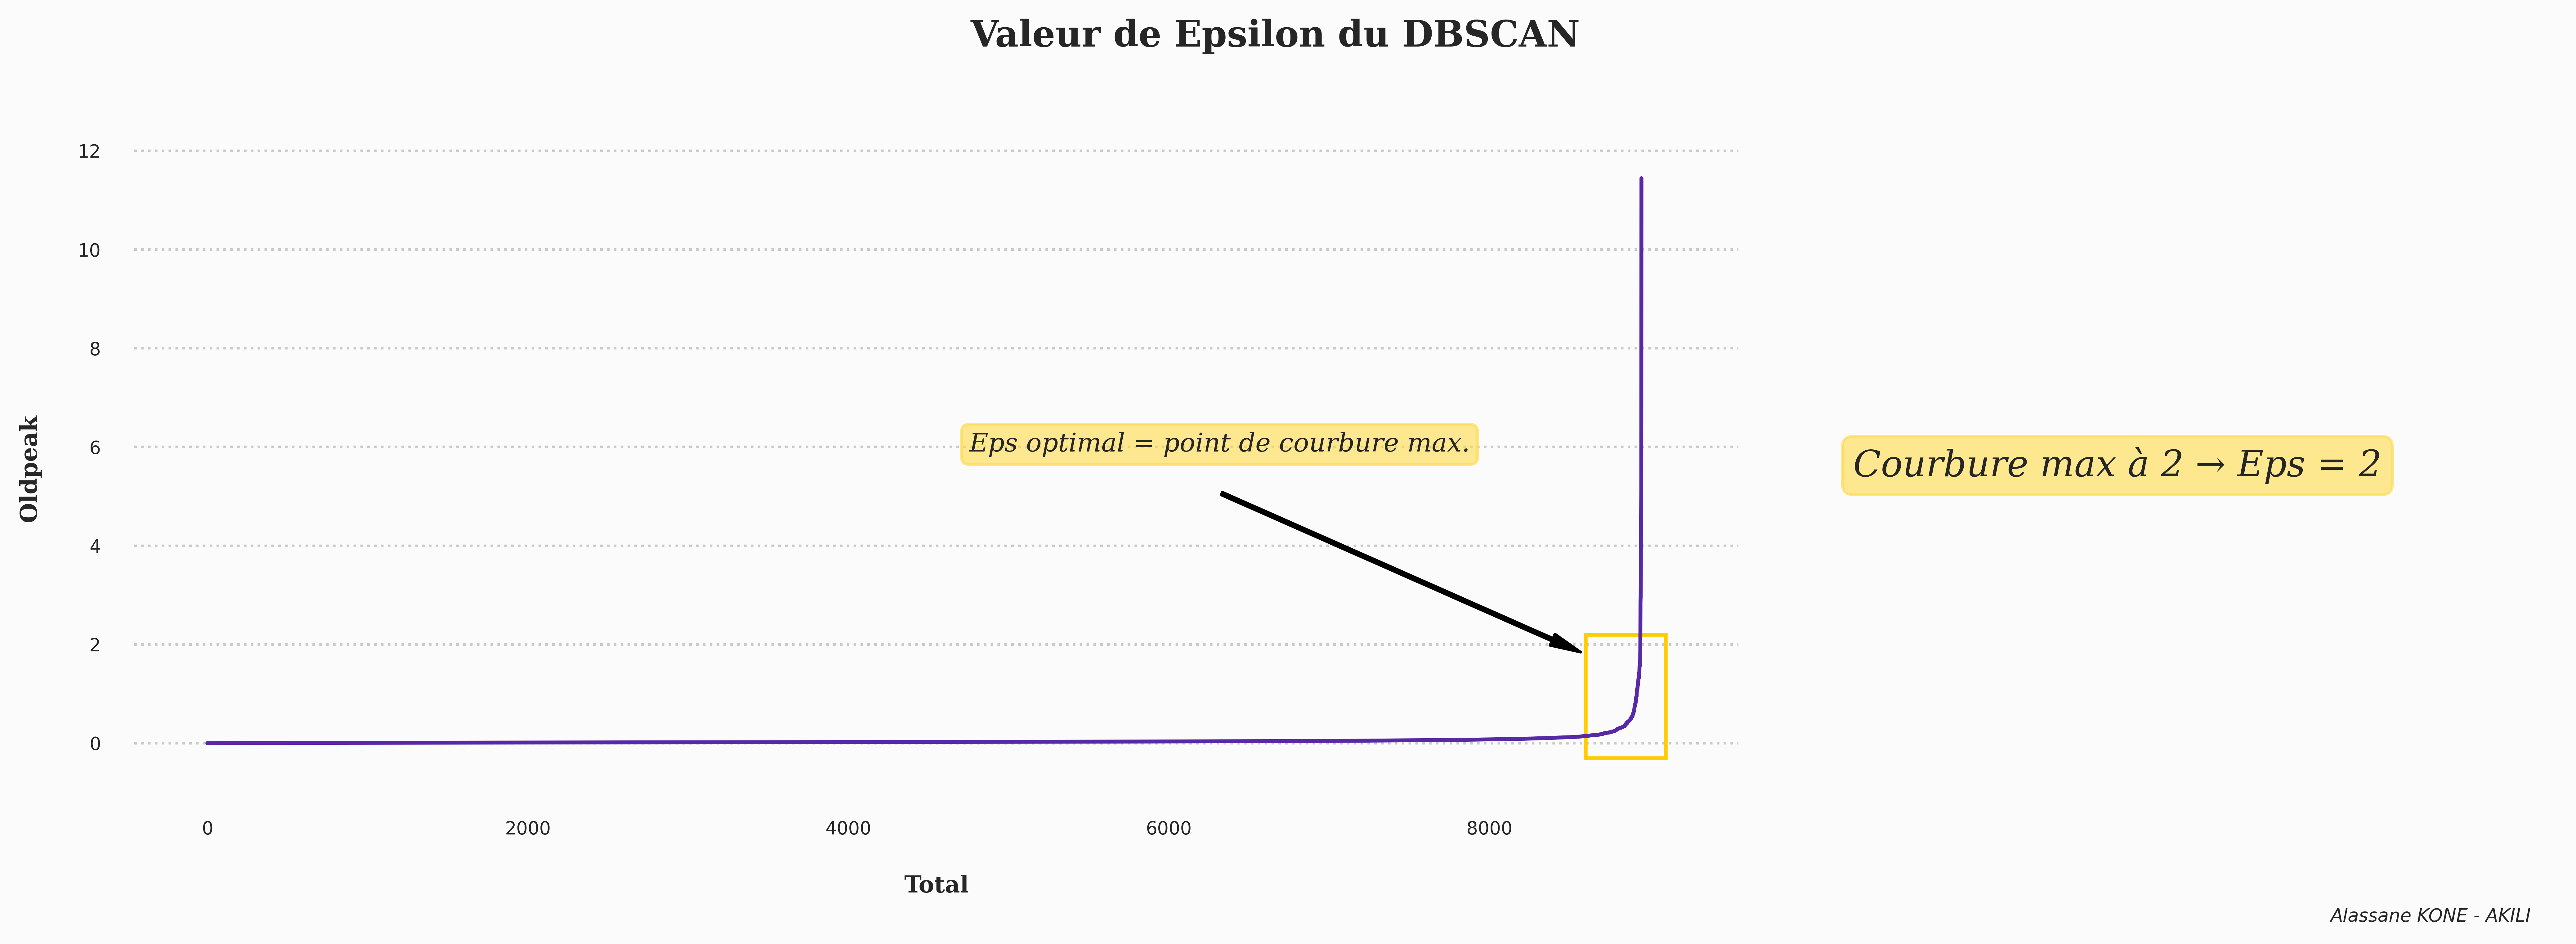

In [ ]:
# --- Define Epsilon Values ---
def epsilon():
    
    # --- Calculate Nearest Neighbors ---
    neighbors=NearestNeighbors(n_neighbors=2)
    nbrs=neighbors.fit(X)
    distances, indices=nbrs.kneighbors(X)
    distances=np.sort(distances, axis = 0)
    
    # --- Figure Settings ---
    bbox=dict(boxstyle='round', pad=0.3, color='#FFDA47', alpha=0.6)
    txt1=dict(textcoords='offset points', va='center', ha='center', fontfamily='serif', style='italic')
    txt2=dict(textcoords='offset points', va='center', fontfamily='serif', style='italic')
    kw=dict(arrowstyle='Simple, tail_width=0.1, head_width=0.4, head_length=1', color='black')
    text_style=dict(fontweight='bold', fontfamily='serif')
    fig=plt.figure(figsize=(14, 5))
    
    # --- Epsilon Plot ---
    distances_1=distances[:, 1]
    ax1=fig.add_subplot(1, 3, (1, 2))
    plt.plot(distances_1, color='#5829A7')
    plt.xlabel('\nTotal', fontsize=9, **text_style)
    plt.ylabel('Oldpeak\n', fontsize=9, **text_style)
    ax1.add_patch(Rectangle((8600, -0.3), 500, 2.5, edgecolor='#FFCC00', fill=False, lw=1.5))
    plt.annotate('Eps optimal = point de courbure max.', xy=(6300, 6), xytext=(1, 1), fontsize=10, bbox=bbox, **txt1)
    #Eps optimal = point de courbure max i.e
    #La valeur optimale d'Epsilon est au point de courbure maximale
    plt.annotate('', xy=(8600, 1.8), xytext=(6300, 5.1), arrowprops=kw)
    for spine in ax1.spines.values():
        spine.set_color('None')
    plt.grid(axis='y', alpha=0.5, color='#9B9A9C', linestyle='dotted')
    plt.grid(axis='x', alpha=0)
    plt.tick_params(labelsize=7)
    
    # --- Explanations ---
    ax2=fig.add_subplot(1, 3, 3)
    plt.annotate('Courbure max à 2 → Eps = 2', xy=(0.1, 0.5), xytext=(1, 1), fontsize=14, bbox=bbox, **txt2)
    #Courbure max à 2 → Eps = 2 i.e
    #À partir du graphique, la courbure maximale de la courbe est d'environ 2, et donc nous avons choisi notre Eps comme 2.
    for spine in ax2.spines.values():
        spine.set_color('None')
    plt.grid(axis='both', alpha=0)
    plt.axis('off')
    
    plt.suptitle('Valeur de Epsilon du DBSCAN  \n', fontsize=14, **text_style)
    
    plt.gcf().text(0.9, 0.01, 'Alassane KONE - AKILI', style='italic', fontsize=7)
    plt.tight_layout()
    plt.show();

# --- Calling Epsilon Functions ---
epsilon();

<div class="explain-box">
   En se basant sur les résultats de la courbure maximale ci-dessus et les valeurs précédentes de MinPoint, l'étape suivante consiste à <mark><b>mettre en œuvre DBSCAN et à évaluer les résultats</b></mark>.
</div>


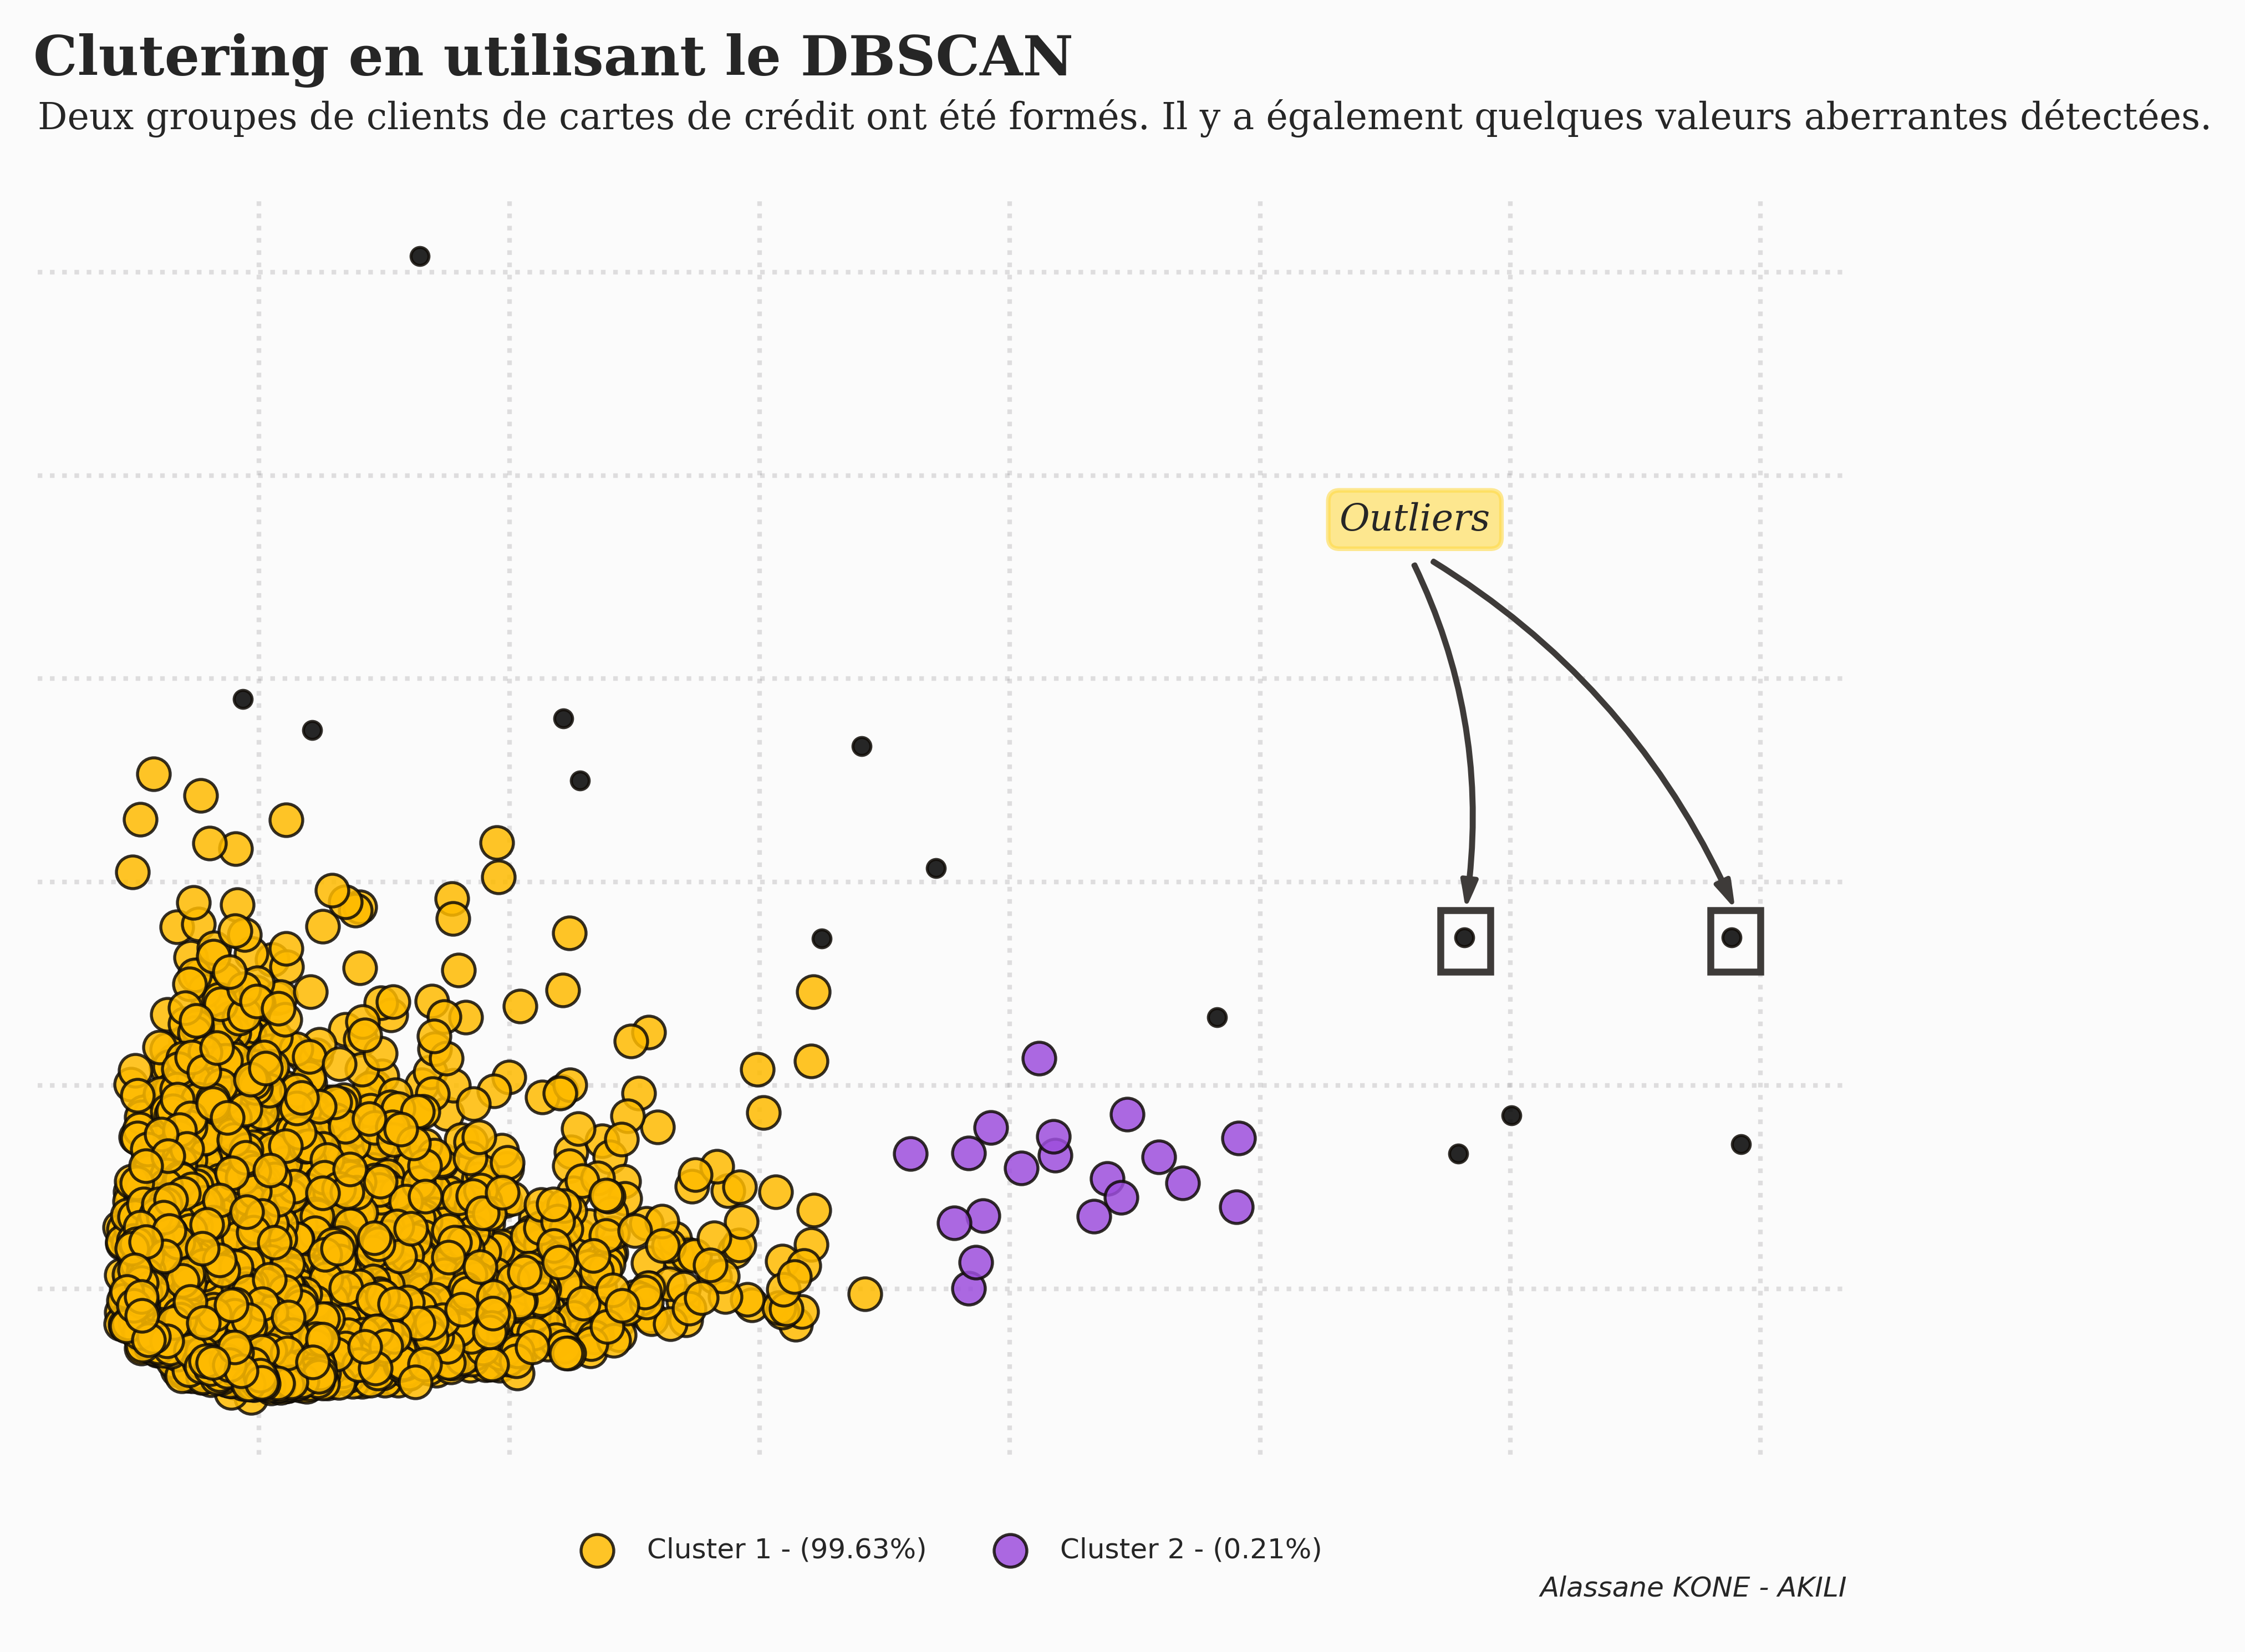

In [ ]:
# --- Implementing DBSCAN ---
dbscan = DBSCAN(eps=2, min_samples=4)
y_dbscan = dbscan.fit_predict(X)
    
# --- Define DBSCAN Result Distribution ---
def dbscan_visualizer(dbscan, y_dbscan):
    
    # --- Figures Settings ---
    cluster_colors=['#FFBB00', '#9D4EDD', 'black']
    labels = ['Cluster 1', 'Cluster 2', 'Outliers']
    suptitle=dict(fontsize=12, fontweight='heavy', fontfamily='serif')
    title=dict(fontsize=8, fontfamily='serif')
    scatter_style=dict(linewidth=0.65, edgecolor='#100C07', alpha=0.85)
    bbox=dict(boxstyle='round', pad=0.3, color='#FFDA47', alpha=0.6)
    txt=dict(textcoords='offset points', va='center', ha='center', fontfamily='serif', style='italic')
    legend_style=dict(borderpad=2, frameon=False, fontsize=6)
    
    # --- Arrow Settings ---
    style = 'Simple, tail_width=0.3, head_width=3, head_length=5'
    kw = dict(arrowstyle=style, color='#3E3B39')
    arrow1 = patches.FancyArrowPatch((23, 18), (24.1, 9.3), connectionstyle='arc3, rad=-0.16', **kw)
    arrow2 = patches.FancyArrowPatch((23.3, 18), (29.5, 9.3), connectionstyle='arc3, rad=-0.16', **kw)
    
    # --- Percentage labels ---
    unique, counts = np.unique(y_dbscan, return_counts=True)
    dbscan_count = dict(zip(unique, counts))
    total = sum(dbscan_count.values())
    dbscan_label = {key: round(value/total*100, 2) for key, value in dbscan_count.items() if key != -1}

    # --- Clusters Distribution ---
    y_dbscan_labels = list(set(y_dbscan.tolist()))
    fig, ax = plt.subplots(1, 1, figsize=(7, 5))
    for i in np.arange(0, 2, 1):
        plt.scatter(X[y_dbscan==i, 0], X[y_dbscan == i, 1], s=50, c=cluster_colors[i], label=labels[i], **scatter_style)
    plt.scatter(X[y_dbscan==-1, 0], X[y_dbscan == -1, 1], s=15, c=cluster_colors[2], label=labels[2], **scatter_style)
    for spine in ax.spines.values():
        spine.set_color('None')
    plt.legend([f"Cluster {i+1} - ({k}%)" for i, k in dbscan_label.items()], bbox_to_anchor=(0.75, -0.01), ncol=3, **legend_style)
    plt.grid(axis='both', alpha=0.3, color='#9B9A9C', linestyle='dotted')
    ax.add_patch(Rectangle((29, 7.8), 1, 1.5, edgecolor='#3E3B39', fill=False, lw=1.5))
    ax.add_patch(Rectangle((23.6, 7.8), 1, 1.5, edgecolor='#3E3B39', fill=False, lw=1.5))
    ax.add_patch(arrow1)
    ax.add_patch(arrow2)
    plt.annotate('Outliers', xy=(23, 18.8), xytext=(1, 1), fontsize=8, bbox=bbox, **txt)
    plt.tick_params(left=False, right=False , labelleft=False , labelbottom=False, bottom=False)
    plt.title('Deux groupes de clients de cartes de crédit ont été formés. Il y a également quelques valeurs aberrantes détectées.\n', loc='left', **title)
    plt.suptitle('Clutering en utilisant le DBSCAN', x=0.123, y=0.98, ha='left', **suptitle)
    plt.gcf().text(0.77, 0.04, 'Alassane KONE - AKILI', style='italic', fontsize=6)
    plt.show();
    
# --- Calling DBSCAN Functions ---
dbscan_visualizer(dbscan, y_dbscan);

<div class="explain-box">
    De l'implémentation de <b>DBSCAN</b>, <mark><b>2 clusters ont été formés</b></mark>. <b>Le cluster 1 a le plus de points de données</b> par rapport au cluster 2. Cependant, <mark><b>il y a quelques valeurs aberrantes détectées</b></mark> car certains points sont trop éloignés des autres points de données (DBSCAN les considère comme des valeurs aberrantes et attribue l'étiquette -1 à ces points). L'étape suivante consiste à <b>évaluer la qualité du regroupement</b> que fournit DBSCAN.
</div>


In [ ]:
# --- Evaluate DBSCAN Cluster Quality ---
db_dbscan, ss_dbscan, ch_dbscan = evaluate_clustering(X, y_dbscan)

.: Evaluation de la qualité des clusteringd :.
*********************************************
.: Index de Davies-Bouldin:  1.287
.: Calinski Harabasz Index:  685.303
.: Index de Score de Silhouette :  0.803


<div class="explain-box">
   La <b>qualité du regroupement</b> obtenue avec DBSCAN en utilisant deux groupes et des outliers est <mark><b>acceptable</b></mark> selon le score d'évaluation. Le <b>score de silhouette est meilleur qu'avec K-Means</b> car il y a un grand groupe et un petit groupe formé, bien que l'<b>indice de Davies-Bouldin soit plus élevé que K-Means</b>, ce qui indique un regroupement acceptable. Cependant, l'<b>indice de Calinski-Harabasz obtenu est beaucoup plus faible que K-Means</b>.
</div>

## <div class="header2">7.3 | Clustering Hiérarchique)</div>
<div class="explain-box">
    <blockquote style="color: #000000;">
       Le <mark><b>clustering Hiérarchique</b></mark> fonctionne en <mark><b>regroupant les données</b></mark> en un <b>arbre de clusters</b>.<br><br> Le clustering hiérarchique commence en traitant chaque point de données comme un cluster séparé. Ensuite, il identifie à plusieurs reprises les 2 clusters qui sont les plus proches l'un de l'autre et fusionne les 2 clusters les plus comparables <b>jusqu'à ce que tous les clusters soient fusionnés ensemble</b>.<br><br> Dans le clustering hiérarchique, l'objectif est de <mark><b>produire une série hiérarchique de clusters imbriqués</b></mark>. Des dendrogrammes sont utilisés pour <b>visualiser l'historique des regroupements et déterminer le nombre optimal de clusters</b>.<br><br> Ensuite, en utilisant les dendrogrammes générés, nous déterminons la plus grande distance verticale qui n'intersecte aucun des autres clusters. Après cela, nous dessinons une ligne seuil/horizontale à chaque extrémité.<br><br> Enfin, le nombre optimal de clusters est égal au nombre de lignes verticales passant à travers la ligne horizontale. Par exemple, dans le cas ci-dessous, le meilleur choix pour le nombre de clusters sera de 4.<br><br>
    <center>
    <img src="https://miro.medium.com/max/1198/1*VvOVxdBb74IOxxF2RmthCQ.png" alt="Dendogram" width="55%"> <img src="https://miro.medium.com/max/1100/1*guOwD01bko5ITVIJWQdIPQ.png" alt="Clustering" width="40%">

   <br><br>En premier lieu, nous devons <mark><b>créer un dendrogramme puis dessiner une ligne horizontale entre les deux points</b></mark>. Ensuite, nous <mark><b>évaluerons le dendrogramme créé et comparerons les résultats avec le score de Calinski-Harabasz</b></mark>.
</div>


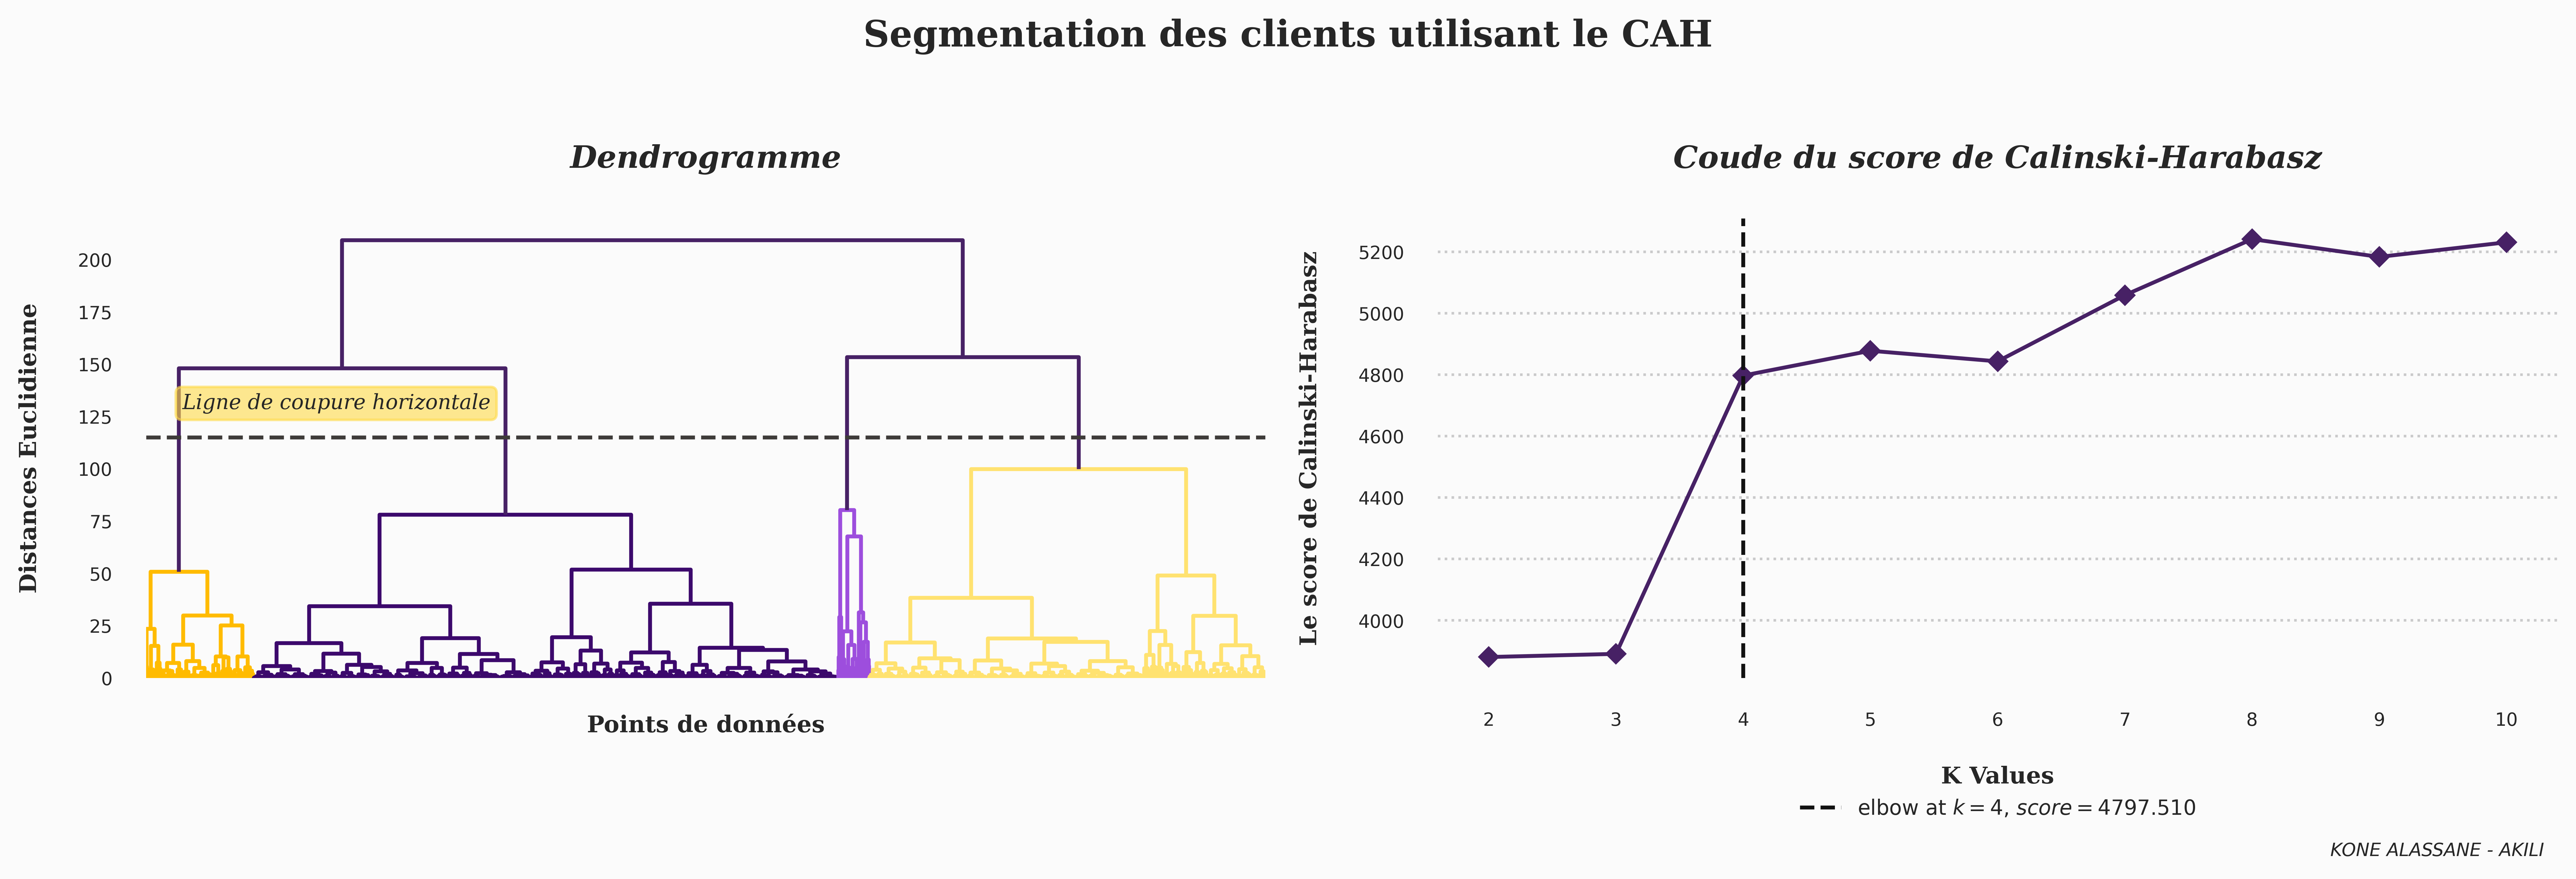

In [ ]:
# --- Define Dendrogram ---
def agg_dendrogram():
    
    # --- Figure Settings ---
    color_palette=['#472165', '#FFBB00', '#3C096C', '#9D4EDD', '#FFE270']
    set_palette(color_palette)
    text_style=dict(fontweight='bold', fontfamily='serif')
    ann=dict(textcoords='offset points', va='center', ha='center', fontfamily='serif', style='italic')
    title=dict(fontsize=12, fontweight='bold', style='italic', fontfamily='serif')
    bbox=dict(boxstyle='round', pad=0.3, color='#FFDA47', alpha=0.6)
    fig=plt.figure(figsize=(14, 5))
    
    # --- Dendrogram Plot ---
    ax1=fig.add_subplot(1, 2, 1)
    dend=shc.dendrogram(shc.linkage(X, method='ward', metric='euclidean'))
    plt.axhline(y=115, color='#3E3B39', linestyle='--')
    plt.xlabel('\nPoints de données', fontsize=9, **text_style)
    plt.ylabel('Distances Euclidienne\n', fontsize=9, **text_style)
    plt.annotate('Ligne de coupure horizontale', xy=(15000, 130), xytext=(1, 1), fontsize=8, bbox=bbox, **ann)
    plt.tick_params(labelbottom=False)
    for spine in ax1.spines.values():
        spine.set_color('None')
    plt.grid(axis='both', alpha=0)
    plt.tick_params(labelsize=7)
    plt.title('Dendrogramme\n', **title)
    
    # --- Elbow Score (Calinski-Harabasz Index) ---
    ax2=fig.add_subplot(1, 2, 2)
    elbow_score_ch = KElbowVisualizer(AgglomerativeClustering(), metric='calinski_harabasz', timings=False, ax=ax2)
    elbow_score_ch.fit(X)
    elbow_score_ch.finalize()
    elbow_score_ch.ax.set_title('Coude du score de Calinski-Harabasz\n', **title)
    elbow_score_ch.ax.tick_params(labelsize=7)
    for text in elbow_score_ch.ax.legend_.texts:
        text.set_fontsize(9)
    for spine in elbow_score_ch.ax.spines.values():
        spine.set_color('None')
    elbow_score_ch.ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), borderpad=2, frameon=False, fontsize=8)
    elbow_score_ch.ax.grid(axis='y', alpha=0.5, color='#9B9A9C', linestyle='dotted')
    elbow_score_ch.ax.grid(axis='x', alpha=0)
    elbow_score_ch.ax.set_xlabel('\nK Values', fontsize=9, **text_style)
    elbow_score_ch.ax.set_ylabel('Le score de Calinski-Harabasz\n', fontsize=9, **text_style)
    
    plt.suptitle('Segmentation des clients utilisant le CAH\n', fontsize=14, **text_style)
    plt.gcf().text(0.9, 0.08, 'KONE ALASSANE - AKILI', style='italic', fontsize=7)
    plt.tight_layout()
    plt.show();

# --- Calling Dendrogram Functions ---
agg_dendrogram();

<div class="explain-box">
   En fonction de la distance euclidienne dans le dendrogramme ci-dessus, on peut conclure que <mark><b>le nombre de clusters sera de quatre</b></mark> puisque la plus grande distance verticale est sur la première ligne/branche (à gauche de l'image) et que le seuil coupe le dendrogramme en quatre parties.<br><br> De plus, en se basant sur le <b>score de Calinski-Harabasz</b>, le nombre optimal de clusters obtenu est 4.<br><br>
Ensuite, nous allons <b>mettre en œuvre ce nombre dans l'algorithme de clustering hiérarchique et visualiser et évaluer les clusters créés</b>.
</div>

In [ ]:
# --- Implementing Hierarchical Clustering ---
agg_cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
y_agg_cluster = agg_cluster.fit_predict(X)
    
# --- Define Hierarchical Clustering Distributions ---
def agg_visualizer(agg_cluster, y_agg_cluster):
    
    # --- Figures Settings ---
    cluster_colors=['#FFBB00', '#3C096C', '#9D4EDD', '#FFE270']
    labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']
    suptitle=dict(fontsize=14, fontweight='heavy', fontfamily='serif')
    title=dict(fontsize=10, fontweight='bold', style='italic', fontfamily='serif')
    scatter_style=dict(linewidth=0.65, edgecolor='#100C07', alpha=0.85)
    legend_style=dict(borderpad=2, frameon=False, fontsize=9)
    fig=plt.figure(figsize=(14, 7))
    
    # --- Percentage Labels ---
    unique, counts = np.unique(y_agg_cluster, return_counts=True)
    df_waffle = dict(zip(unique, counts))
    total = sum(df_waffle.values())
    wfl_square = {key: value/100 for key, value in df_waffle.items()}
    wfl_label = {key: round(value/total*100, 2) for key, value in df_waffle.items()}

    # --- Clusters Distribution ---
    y_agg_labels = list(set(y_agg_cluster.tolist()))
    ax1=fig.add_subplot(1, 3, (1, 2))
    for i in y_agg_labels:
        ax1.scatter(X[y_agg_cluster==i, 0], X[y_agg_cluster == i, 1], s=50, c=cluster_colors[i], label=labels[i], **scatter_style)
    for spine in ax1.spines.values():
        spine.set_color('None')
    for spine in ['bottom', 'left']:
        ax1.spines[spine].set_visible(True)
        ax1.spines[spine].set_color('#CAC9CD')
    ax1.legend([f"Cluster {i+1} - ({k}%)" for i, k in wfl_label.items()], bbox_to_anchor=(1.3, -0.03), ncol=4, **legend_style)
    ax1.grid(axis='both', alpha=0.3, color='#9B9A9C', linestyle='dotted')
    ax1.tick_params(left=False, right=False , labelleft=False , labelbottom=False, bottom=False)
    plt.title('Nuage de points de la distribution des Clusters\n', **title)
    
    # --- Waffle Chart ---
    ax2=fig.add_subplot(1, 3, 3)
    ax2.set_title('Pourcentage de chaque cluster\n', **title)
    ax2.set_aspect(aspect='auto')
    Waffle.make_waffle(ax=ax2, rows=7, values=wfl_square, colors=cluster_colors, icons='user', icon_size=16)
    ax2.get_legend().remove()
    ax2.text(0.01, 0.95, '** 1 square ≈ 100 customers', style='italic', fontsize=7)
    
    plt.suptitle('Segmentation des client par le CAH\n', **suptitle)
    plt.gcf().text(0.83, -0.01, 'KONE ALASSANE - AKILI', style='italic', fontsize=6)
    plt.show();
    
# --- Calling Hierarchical Clustering Functions ---
agg_visualizer(agg_cluster, y_agg_cluster);

<div class="explain-box">
    À partir de la mise en œuvre du clustering hiérarchique, on peut voir qu'il y a 
  <mark>
  <b>4 clusters formés
  </b></mark>. Parmi les 4 clusters, <b>le cluster 2 a le plus grand nombre de points de données</b>, suivi du cluster 1. <br><br>
    Cependant, lorsque l'on compare les résultats du clustering par K-Means, les résultats du cluster 2 en utilisant le clustering hiérarchique ont une <b>proportion plus significative
  </b>. <br><br>
    De plus, l'algorithme de clustering hiérarchique considère que <b>les valeurs aberrantes font partie du cluster 3
  </b>.<br><br>
La dernière étape consiste à <mark><b>évaluer la qualité du clustering</b></mark> offert par le clustering hiérarchique. Le <b>score de silhouette</b> et l'<b>indice de Davies-Bouldin</b> seront utilisés pour évaluer la qualité.
</div>


In [ ]:
# --- Evaluate DBSCAN Cluster Quality ---
db_agg, ss_agg, ch_agg = evaluate_clustering(X, y_agg_cluster)

.: Evaluation de la qualité des clusteringd :.
*********************************************
.: Index de Davies-Bouldin:  0.863
.: Calinski Harabasz Index:  4797.51
.: Index de Score de Silhouette :  0.388


<div class="explain-box">
En se basant sur les résultats d'évaluation de la qualité du clustering utilisant l'approche hiérarchique, on peut constater que les résultats obtenus sont légèrement différents de ceux de K-Means.<br><br> En utilisant la méthode hiérarchique(CAH), le score de silhouette obtenu est proche de 0, ce qui indique des clusters qui se chevauchent. <br><br>De plus, un indice de Davies-Bouldin élevé indique une qualité de clustering correcte. <br><br>Comparé à K-Means, le score de silhouette pour la méthode hiérarchique est supérieur de 0,06. <br><br>Et pour l'indice de Davies-Bouldin, les résultats obtenus sont inférieurs de 0,02. L'indice de Calinski-Harabasz obtenu est légèrement inférieur à celui de K-Means, mais supérieur à celui de DBSCAN.
</div>


In [ ]:
# --- Comparison Table ---
table_de_comparaison_des_modeles = pd.DataFrame({'Modèles': ['K-Means', 'DBSCAN', 'CAH'], 
                        'Indexe de Davies-Bouldin': [db_kmeans, db_dbscan, db_agg],
                        'Score de Silhouette': [ss_kmeans, ss_dbscan, ss_agg],
                       'Indexe de Calinski-Harabasz': [ch_kmeans, ch_dbscan, ch_agg]})
table_de_comparaison_des_modeles.to_excel("../data/comparaison_des_modeles.xlsx",index=False)

In [ ]:
# --- Add K-Means Prediction to Data Frame ----
df = pd.read_csv("../data/donnees_bancaires.csv")
df['cluster_result'] = y_kmeans+1
df['cluster_result'] = 'Cluster '+df['cluster_result'].astype(str)

# --- Calculationg Overall Mean from Current Data Frame ---
df_profile_overall = pd.DataFrame()
df_profile_overall['Overall'] = df.describe().loc[['mean']].T

# --- Summarize Mean of Each Clusters --- 
df_cluster_summary = df.groupby('cluster_result').describe().T.reset_index().rename(columns={'level_0': Variables', 'level_1': 'Metriques'})
df_cluster_summary = df_cluster_summary[df_cluster_summary['Metrics'] == 'mean'].set_index('Variables')

# --- Combining Both Data Frame ---
print(clr.start+'.: Summarize of Each Clusters :.'+clr.end)
print(clr.color+'*' * 33)
df_profile = df_cluster_summary.join(df_profile_overall).reset_index()
df_profile.style.background_gradient(cmap='YlOrBr').hide_index()
df_profile.to_excel("../data/profilage.xlsx",index=False)

.: Summarize of Each Clusters :.
*********************************
